<a href="https://colab.research.google.com/github/prasannashrestha011/ML_exercises/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np

In [42]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [43]:
#cost function
def compute_cost(X,y,w):
  m=len(y)
  h=sigmoid(X @ w)
  cost=-1/m * np.sum(y*np.log(h)+(1-y)*np.log(1-h))
  return cost

In [44]:
#gradient computation
def compute_gradient(X,y,w):
  m=len(y)
  h=sigmoid(X @ w)
  gradient=(1/m)*(X.T @(h-y))
  return gradient

In [45]:
# gradient descent
def gradient_descent(X,y,w,lr,iterations):
  cost_history=[]
  for _ in range(iterations):
    grad=compute_gradient(X,y,w)
    w-=lr*grad
    cost_history.append(compute_cost(X,y,w))
  return w,cost_history

In [46]:
def predict(X,w):
  probabilites=sigmoid(X @ w)
  return (probabilites>=0.5).astype(int)

In [48]:

X = np.array([[1, 2], [1, 3], [2, 4], [3, 5], [5, 7]])
y = np.array([0, 0, 0, 1, 1])

X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
w = np.zeros(X.shape[1])

# Train model
theta, cost_history = gradient_descent(X, y, w, lr=0.1, iterations=1000)

print("Final parameters:", w)
print("Final cost:", cost_history[-1])


preds = predict(X, w)
print("Predictions:", preds)


Final parameters: [-4.25292004  4.12437935 -1.33500192]
Final cost: 0.10385040339329062
Predictions: [0 0 0 1 1]


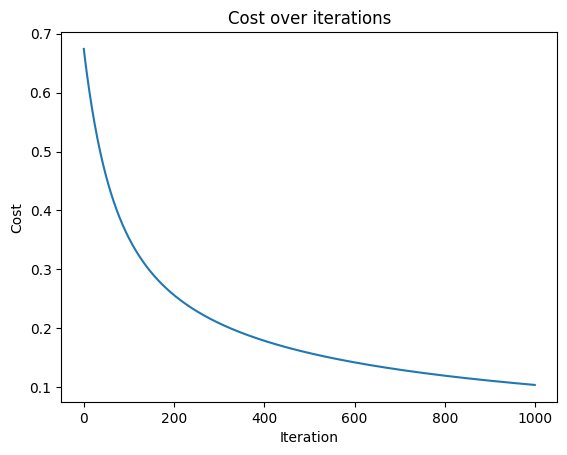

In [49]:
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost over iterations")
plt.show()
